In [1]:
# Importing and viwing the dataset
import pandas as pd 
listings = pd.read_csv('listings.csv')
print(listings.iloc[0])

id                                                                            7087327
listing_url                                      https://www.airbnb.com/rooms/7087327
scrape_id                                                              20151002231825
last_scraped                                                               2015-10-03
name                                               Historic DC Condo-Walk to Capitol!
summary                             Professional pictures coming soon! Welcome to ...
space                                                                             NaN
description                         Professional pictures coming soon! Welcome to ...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                                               

In [2]:
# Calculating Euclidean distance for a univariate case.using the first living space in the dataset
# the living space we want to rent out accomodates 3 people.

import numpy as np
our_acc_value = 3
first_living_space_value = listings.iloc[0]['accommodates']
first_distance = np.abs(first_living_space_value - our_acc_value) # np.abs() makes the values absolute.
print(first_distance)

1


In [3]:
# Calculating the distance btw each value in the accommodates column and the value 3. creating a new column in the dataset called distance.
new_listing = 3
listings['distance'] = listings['accommodates'].apply(lambda x: np.abs(x-new_listing))
print(listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


In [4]:
# Randomizing the dataset
np.random.seed(1)
listings = listings.loc[np.random.permutation(len(listings))]
listings = listings.sort_values('distance')
print(listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


In [5]:
#Cleaning the price column.removing commas and dollar sign and converting to floats from the price column.
stripped_commas = listings['price'].str.replace(',','')
stripped_dollar = stripped_commas.str.replace('$','')
listings['price'] = stripped_dollar.astype('float') # converting values in the price column to 'float' datatype.

# Mean price of the first 5 
mean_price = listings.iloc[0:5]['price'].mean()
print(mean_price)

156.6


In [6]:
#Initial code block so far before function
listings = pd.read_csv('listings.csv')
stripped_commas = listings['price'].str.replace(',','')
stripped_dollar = stripped_commas.str.replace('$','')
listings['price'] = stripped_dollar.astype('float')
listings = listings.loc[np.random.permutation(len(listings))]

# function to predict price using the k-nearest neighbor machine learning technique.

def predict_price(new_listing):
    temp_df = listings.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x:np.abs(x-new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return (predicted_price)
acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)
print(acc_one)
print(acc_two)
print(acc_four)

# We now have a function that can predict the price for any living space as long as we know the number of people it can accommodate. 

71.8
96.8
96.0


In [7]:
# Testing the quality of the model. train/test validation
import pandas as pd
import numpy as np
dc_listings= pd.read_csv('listings.csv')
stripped_commas = dc_listings['price'].str.replace(',','')
stripped_dollar = stripped_commas.str.replace('$','')
dc_listings['price'] = stripped_dollar.astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listings):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x:np.abs(x-new_listings))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predict_price = nearest_neighbor_prices.mean()
    return(predict_price)
test_df = test_df.copy()

test_df['predicted_price'] = test_df['accommodates'].apply(predict_price)

In [8]:
# Error metric . Calculating the Mean Absolute Error.
import numpy as np
test_df['error'] = np.abs(test_df['predicted_price'] - test_df['price'])
mae = test_df['error'].mean()
print(mae)

56.29001074113856


In [9]:
# Error metric . Calculating Mean Squared Error
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse = test_df['squared_error'].mean()
print(mse)

18646.525370569278


In [10]:
# Training another model.
train_df = dc_listings.iloc[0:2790]
test_df = dc_listings.iloc[2790:]

def predict_price(new_listing):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x:np.abs(x-new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)

test_df = test_df.copy()
test_df['predicted_prices'] = test_df['bathrooms'].apply(lambda x: predict_price(x))
test_df['squared_error'] = (test_df['predicted_prices'] - test_df['price'])**2
mse = test_df['squared_error'].mean()
print(mse)

17358.63043944266


In [11]:
# Error Metric - root Mean Squared Error
test_df['predicted_price'] = test_df['bathrooms'].apply(lambda x:predict_price(x))
test_df['squared_error'] = (test_df['predicted_price'] - test_df['price'])**2
mse = test_df['squared_error'].mean()
rmse = mse **(1/2)
print(rmse)

131.7521553502737


In [12]:
# dataset
dc_listings = pd.read_csv('listings.csv')
columns = ['host_response_rate','host_acceptance_rate','host_listings_count','latitude','longitude','city','zipcode','state','accommodates','room_type','bedrooms','bathrooms','beds','price','cleaning_fee','security_deposit','minimum_nights','maximum_nights','number_of_reviews']
dc_listings = dc_listings[columns] 
# Multivariate K-nearest neighbor
# Removing columns
drop_columns = ['room_type','city','state','latitude','longitude','zipcode','host_response_rate','host_acceptance_rate','host_listings_count']
dc_listings = dc_listings.drop(drop_columns, axis = 1)
print(dc_listings.isnull().sum())

accommodates            0
bedrooms               21
bathrooms              27
beds                   11
price                   0
cleaning_fee         1388
security_deposit     2297
minimum_nights          0
maximum_nights          0
number_of_reviews       0
dtype: int64


In [13]:
# Dropping the cleaning fee and security deposit columns
dc_listings = dc_listings.drop(['cleaning_fee','security_deposit'], axis=1)
# Dropping rows with null values.
dc_listings = dc_listings.dropna(axis = 0)
print(dc_listings.isnull().sum())

accommodates         0
bedrooms             0
bathrooms            0
beds                 0
price                0
minimum_nights       0
maximum_nights       0
number_of_reviews    0
dtype: int64


In [15]:
# Formatting the price column
stripped_commas = dc_listings['price'].str.replace(',','')
stripped_dollar = stripped_commas.str.replace('$','')
dc_listings['price'] = stripped_dollar.astype('float')

# Normalizing columns
normalized_listings = dc_listings - dc_listings.mean()
normalized_listings = normalized_listings/(dc_listings.std())
normalized_listings['price'] = dc_listings['price']
print(normalized_listings.head(3))

   accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
0      0.401366 -0.249467  -0.439151  0.297345  160.0       -0.341375   
1      1.399275  2.129218   2.969147  1.141549  350.0       -0.065038   
2     -1.095499 -0.249467   1.264998 -0.546858   50.0       -0.065038   

   maximum_nights  number_of_reviews  
0       -0.016573          -0.516709  
1       -0.016603           1.706535  
2       -0.016573          -0.482505  


In [ ]:
# SCIKIT LEARN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [18]:
# Machine Learning workflow using Scikit learn. using only 2 features(accommodates and bathrooms)

from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]
train_columns = ['accommodates','bathrooms']

# Instantiate Machine learning Model.
knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')

# Fit model to data.
knn.fit(train_df[train_columns], train_df['price'])

# Use Model to make predictions.
predictions = knn.predict(test_df[train_columns])

# Calculating Error metric- MSE and RMSE
from sklearn.metrics import mean_squared_error

two_features_mse = mean_squared_error(test_df['price'], predictions)

two_features_rmse = two_features_mse **(1/2)

print(two_features_mse)
print(two_features_rmse)


11827.805870307167
108.7557164948453


In [19]:
# using More features.

features = ['accommodates','bedrooms','bathrooms','number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5, algorithm = 'brute')
knn.fit(train_df[features], train_df['price'])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df['price'], four_predictions)
four_rmse = four_mse**(1/2)
print(four_mse)
print(four_rmse)

12416.681547212744
111.43016444039174


In [20]:
# Hyperparameter Optimization- Varying the K value to improve performance.

features = ['accommodates','bedrooms','bathrooms','number_of_reviews']
hyper_params = [x for x in range(1,21)]
mse_values= list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = hp, algorithm = 'brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    
print(mse_values)


[29285.383390216153, 17283.444254835038, 13347.651245101757, 12355.532423208191, 12416.681547212744, 11681.857761344965, 11284.895544565949, 11354.486010381115, 11134.24123934325, 11290.78202502844, 11193.720399778109, 11279.728740045506, 11391.457755249041, 11281.315119221752, 11329.574091770954, 11463.679420861774, 11356.823722301608, 11368.377097992949, 11511.220213728142, 11516.20888225256]


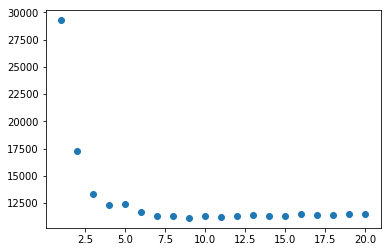

In [22]:
# Visualizing hyperparameter values.
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(hyper_params,mse_values)
plt.show()

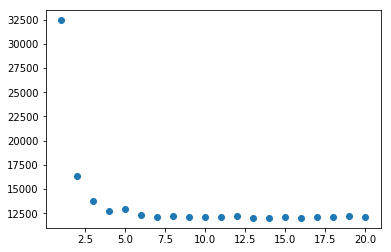

In [24]:
# Varying Features and hyperparameter
hyper_params = [x for x in range(1,21)]
mse_values = list()
features = train_df.columns.tolist()
features.remove('price')

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = hp, algorithm = 'brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
    
plt.scatter(hyper_params, mse_values)
plt.show()

In [25]:
# Varying features and K values
two_features = ['accommodates','bathrooms']
three_features = ['accommodates','bathrooms','bedrooms']
hyper_params = [x for x in range(1,21)]

# Append the first model's MsE value to this list.
two_mse_values = list()
# Append the second Model MSE value to this list.
three_mse_values = list()

two_hyp_mse = dict()
three_hyp_mse = dict()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = hp, algorithm = 'brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df['price'],predictions)
    two_mse_values.append(mse)
    
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k, mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k+1

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = hp, algorithm = 'brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df['price'],predictions)
    three_mse_values.append(mse)
    
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k, mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k+1
        
two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse

print(two_hyp_mse)
print(three_hyp_mse)

{6: 11600.654563266338}
{18: 11547.870159693257}
